In [1]:
import powerlawrs 
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = "../reference_data/blackouts.txt"

# polars and pandas do NOT do a good job detecting headers, do not rely on them.
df = pl.read_csv(file, has_header=False)
data = df.to_series()

# Quickstart: Fit Pareto Type I

In [3]:
fit_results = powerlawrs.fit(data)

In [4]:
print(f"alpha: {fit_results.alpha}\nx_min: {fit_results.x_min}\nKS stat: {fit_results.D}\ntail length: {fit_results.len_tail}")

alpha: 1.2726372198302858
x_min: 230000.0
KS stat: 0.06067379629443781
tail length: 59


# Explore $x_{min}$ and $\alpha$ relationships
The following will demonstrate the methodology proposed by Clauset, Aaron, et al. ‘Power-Law Distributions in Empirical Data’. SIAM Review, vol. 51, no. 4, Society for Industrial & Applied Mathematics (SIAM), Nov. 2009, pp. 661–703, [doi:10.48550/ARXIV.0706.1062](https://doi.org/10.48550/arXiv.0706.1062).

In [5]:
# 1. Generate an alpha paramater via MLE for every x_min in the data 
x_mins, alphas = powerlawrs.estimation.find_alphas_fast(data)
print(f"n: {len(data)}, n_x_mins: {len(x_mins)}, n_alphas: {len(alphas)}")

n: 211, n_x_mins: 210, n_alphas: 210


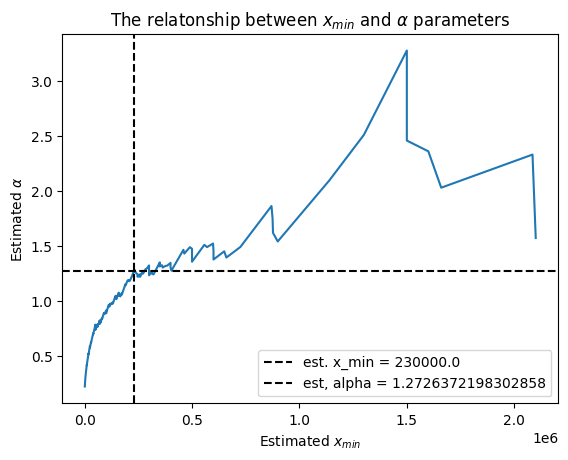

In [6]:
# Plot all of the pairs given the data.
# See Figure 3.3 Clauset et al. [doi:10.48550/ARXIV.0706.1062](https://doi.org/10.48550/arXiv.0706.1062)
plt.plot(x_mins, alphas)
# Identify where the estimate parameters are.
plt.axvline(x = fit_results.x_min, color = 'black', linestyle = '--', label = f"est. x_min = {fit_results.x_min}")
plt.axhline(y = fit_results.alpha, color = 'black', linestyle = '--', label = f"est, alpha = {fit_results.alpha}")
plt.xlabel(r"Estimated $x_{min}$")
plt.ylabel(r"Estimated $\alpha$")
plt.title(r"The relatonship between $x_{min}$ and $\alpha$ parameters")
plt.legend()
plt.plot;

# Explore $x_{min}$ in the context of the broader dataset

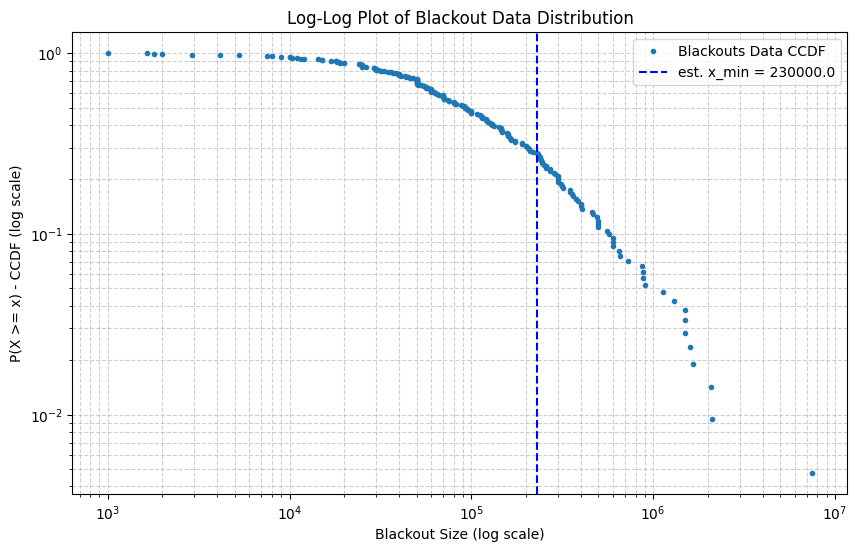

In [7]:
sorted_data = np.sort(data)[::-1]
n = len(sorted_data)
y_values = np.arange(1, n + 1) / n

plt.figure(figsize=(10,6))
plt.loglog(sorted_data, y_values, marker='.', linestyle='none', label="Blackouts Data CCDF")
plt.axvline(x = fit_results.x_min, color = 'b', linestyle = '--', label = f"est. x_min = {fit_results.x_min}")
plt.xlabel('Blackout Size (log scale)')                                                                      
plt.ylabel('P(X >= x) - CCDF (log scale)')                                                                   
plt.title('Log-Log Plot of Blackout Data Distribution')                                                      
plt.grid(True, which="both", ls="--", alpha=0.6)                                                             
plt.legend()                                                                                                 
plt.show()                                                  